In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('prosperLoanData.csv')

In [3]:
date = ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']
for col in date :
    data[col] = data[col].fillna(0) 
data[date] = data[date].astype('datetime64[ns]')

In [4]:
##list of a columns with have null values
null = []
for col in data.columns :
    if (data[col].isnull().sum() > 0) :
        null.append(col)
        
for col in null:
    if(data[col].dtype in ['float64','int64']) :
        data[col] = data[col].fillna(0) 

In [5]:
data.drop('ListingKey',axis=1,inplace=True)
data.drop('MemberKey',axis=1,inplace=True)
data.drop('LoanOriginationQuarter',axis=1,inplace=True)
data.drop('LoanKey',axis=1,inplace=True)
data.drop('GroupKey',axis=1,inplace=True)
data.drop('LoanNumber',axis=1,inplace=True)

In [7]:
numeric = data.select_dtypes(['float64','int64'])
numeric.isnull().sum()

ListingNumber                          0
Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLas

#### Trying IQR on ONE Column

<AxesSubplot:xlabel='Investors'>

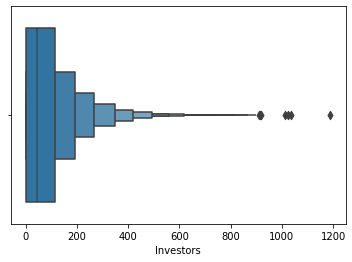

In [11]:
sns.boxenplot(x='Investors',data = data)

In [14]:
q1 = numeric['Investors'].quantile(0.25)
q2 = numeric['Investors'].quantile(0.75)

iqr = q2-q1
iqr

113.0

In [19]:
lower_ex = q1-1.5*iqr
high_ex = q2+1.5*iqr

lower_ex
high_ex

284.5

In [25]:
out1 = numeric[(numeric['Investors']<lower_ex)].values
out2 = numeric[(numeric['Investors']>high_ex)].values

array([[7.57359e+05, 6.00000e+01, 1.16950e-01, ..., 0.00000e+00,
        0.00000e+00, 3.71000e+02],
       [7.16058e+05, 3.60000e+01, 1.25280e-01, ..., 0.00000e+00,
        0.00000e+00, 3.03000e+02],
       [4.78891e+05, 3.60000e+01, 8.19100e-02, ..., 0.00000e+00,
        0.00000e+00, 3.26000e+02],
       ...,
       [2.15516e+05, 3.60000e+01, 8.88500e-02, ..., 0.00000e+00,
        0.00000e+00, 2.98000e+02],
       [2.60999e+05, 3.60000e+01, 1.39150e-01, ..., 0.00000e+00,
        0.00000e+00, 5.80000e+02],
       [3.67938e+05, 3.60000e+01, 1.25500e-01, ..., 1.00000e+00,
        8.36600e+01, 7.54000e+02]])

In [31]:
for i in numeric :
    q1 = numeric[i].quantile(0.25)
    q2 = numeric[i].quantile(0.75)
    iqr = q2-q1
    lower_ex = q1-1.5*iqr
    high_ex = q2+1.5*iqr
    out1 = numeric[(numeric[i]<lower_ex)].values
    out2 = numeric[(numeric[i]>high_ex)].values
    mean = numeric[i].mean()
    numeric[i].replace(out1,mean,inplace=True)
    numeric[i].replace(out2,mean,inplace=True)

KeyboardInterrupt: 

In [35]:
##filling with 3 options >>> mean , drop , lower and higher ex
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

x= numeric.apply(find_iqr)


ListingNumber                          491715.000000
Term                                        0.000000
BorrowerAPR                                 0.127410
BorrowerRate                                0.116000
LenderYield                                 0.115600
EstimatedEffectiveYield                     0.195200
EstimatedLoss                               0.025093
EstimatedReturn                             0.036754
ProsperRating (numeric)                     5.000000
ProsperScore                                7.000000
ListingCategory (numeric)                   2.000000
EmploymentStatusDuration                    0.000000
CreditScoreRangeLower                       0.000000
CreditScoreRangeUpper                       0.000000
CurrentCreditLines                          0.000000
OpenCreditLines                             0.000000
TotalCreditLinespast7years                  0.000000
OpenRevolvingAccounts                       5.000000
OpenRevolvingMonthlyPayment                 0.

In [59]:
for i in x.index :
    lower_ex = q1-1.5*iqr
    high_ex = q2+1.5*iqr
    out1 = numeric[(numeric[i]<lower_ex)].values
    out2 = numeric[(numeric[i]>high_ex)].values
    mean = numeric[i].mean()
    # numeric[i].replace(out1,mean,inplace=True)
    # numeric[i].replace(out2,mean,inplace=True)

# IQR working code 

In [67]:
q1 = numeric.quantile(0.25)
q3 = numeric.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
for col in numeric.columns:
            for i in range(0,len(numeric[col])):
                if numeric[col][i] < lower_bound[col]:            
                    numeric[col][i] = lower_bound[col]

                if numeric[col][i] > upper_bound[col]:            
                    numeric[col][i] = upper_bound[col]

C:\Users\alaa_\AppData\Local\Temp/ipykernel_17740/1384281924.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[col][i] = upper_bound[col]
C:\Users\alaa_\AppData\Local\Temp/ipykernel_17740/1384281924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[col][i] = lower_bound[col]


<AxesSubplot:xlabel='Investors'>

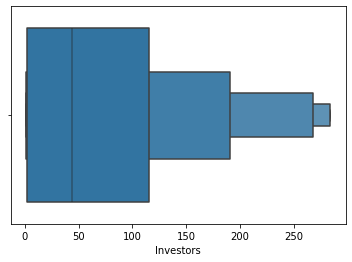

In [69]:
sns.boxenplot(x='Investors',data = numeric)